<a href="https://colab.research.google.com/github/hhc703/XAI/blob/main/Pima_Indian_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


XGBoost로 모델 제작

In [ ]:
#데이터 로드
dataset = loadtxt('/content/gdrive/My Drive/XAI/diabetes.csv', delimiter=',')

#x와 y로 데이터 분리
x = dataset[:, 0:8]
y = dataset[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

#학습 데이터로 모델을 학습시키기
model = XGBClassifier()
model.fit(x_train, y_train)

#예측하기
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

#평가하기
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 81.17%


In [ ]:
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

l = model.predict_proba(value)
print('No Diabetes: {:.2%}\nYes diabetes: {:2%}'.format(l[0][0], l[0][1]))

No Diabetes: 69.09%
Yes diabetes: 30.914500%


설명 가능한 모델 결합

의사 결정 트리 시각화

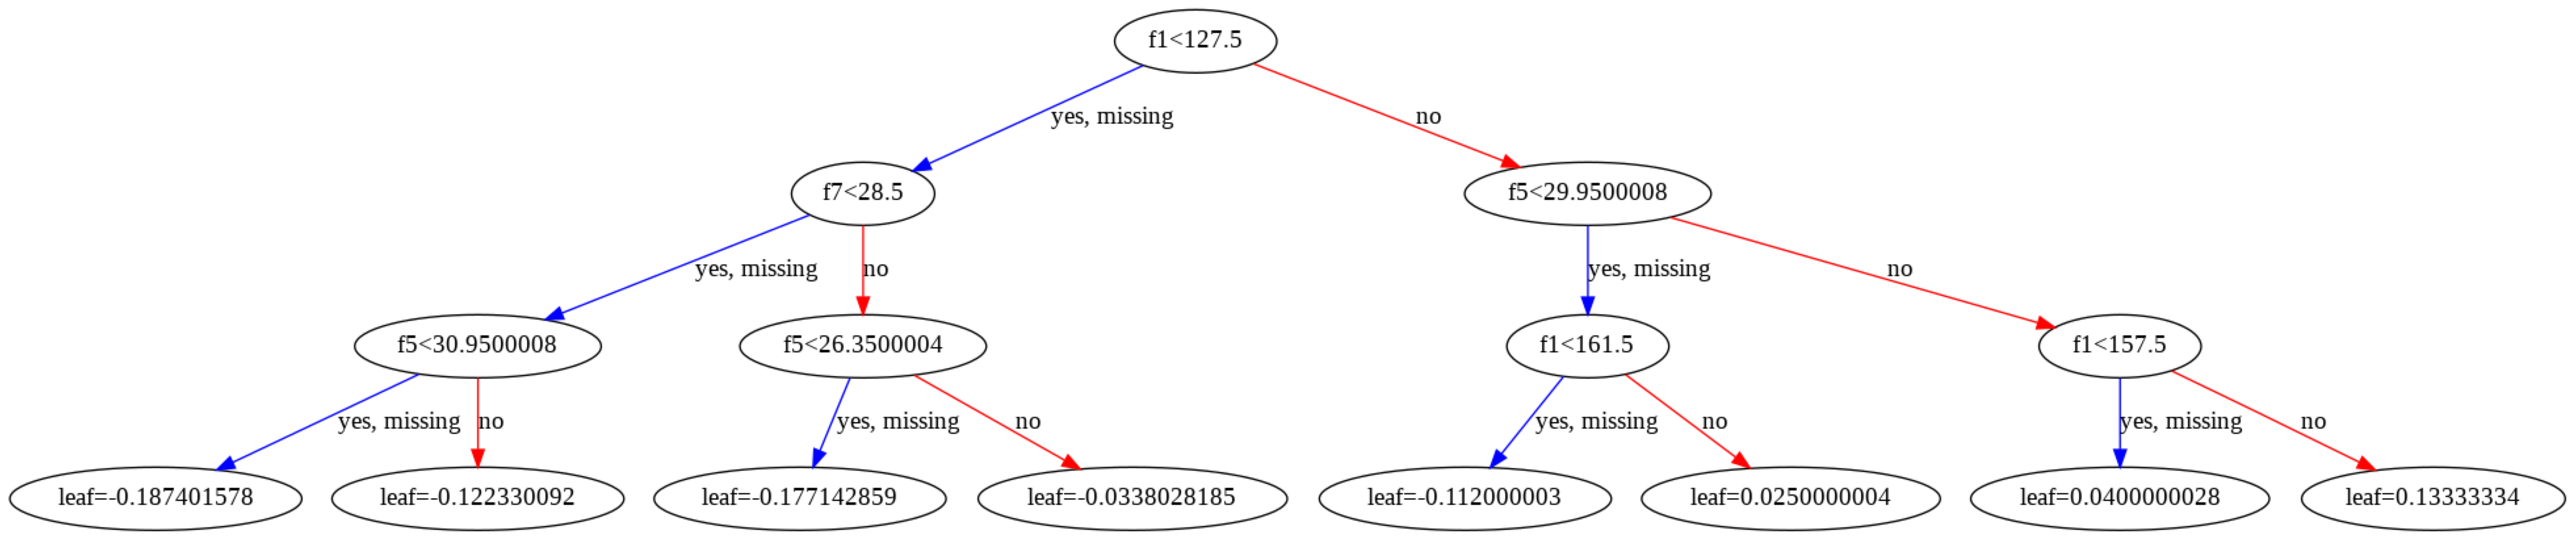

In [ ]:
from xgboost import plot_tree

import matplotlib.pyplot as plt
#matplotlib에서 보여주는 차트의 시각화 옵션을 다시 설정.
from matplotlib.pylab import rcParams

#그림의 (가로,세로)를 인치 단위로 조정하는 파라미터
rcParams['figure.figsize'] = 100,200

#의사 결정 트리 시각화
plot_tree(model)
plt.show()

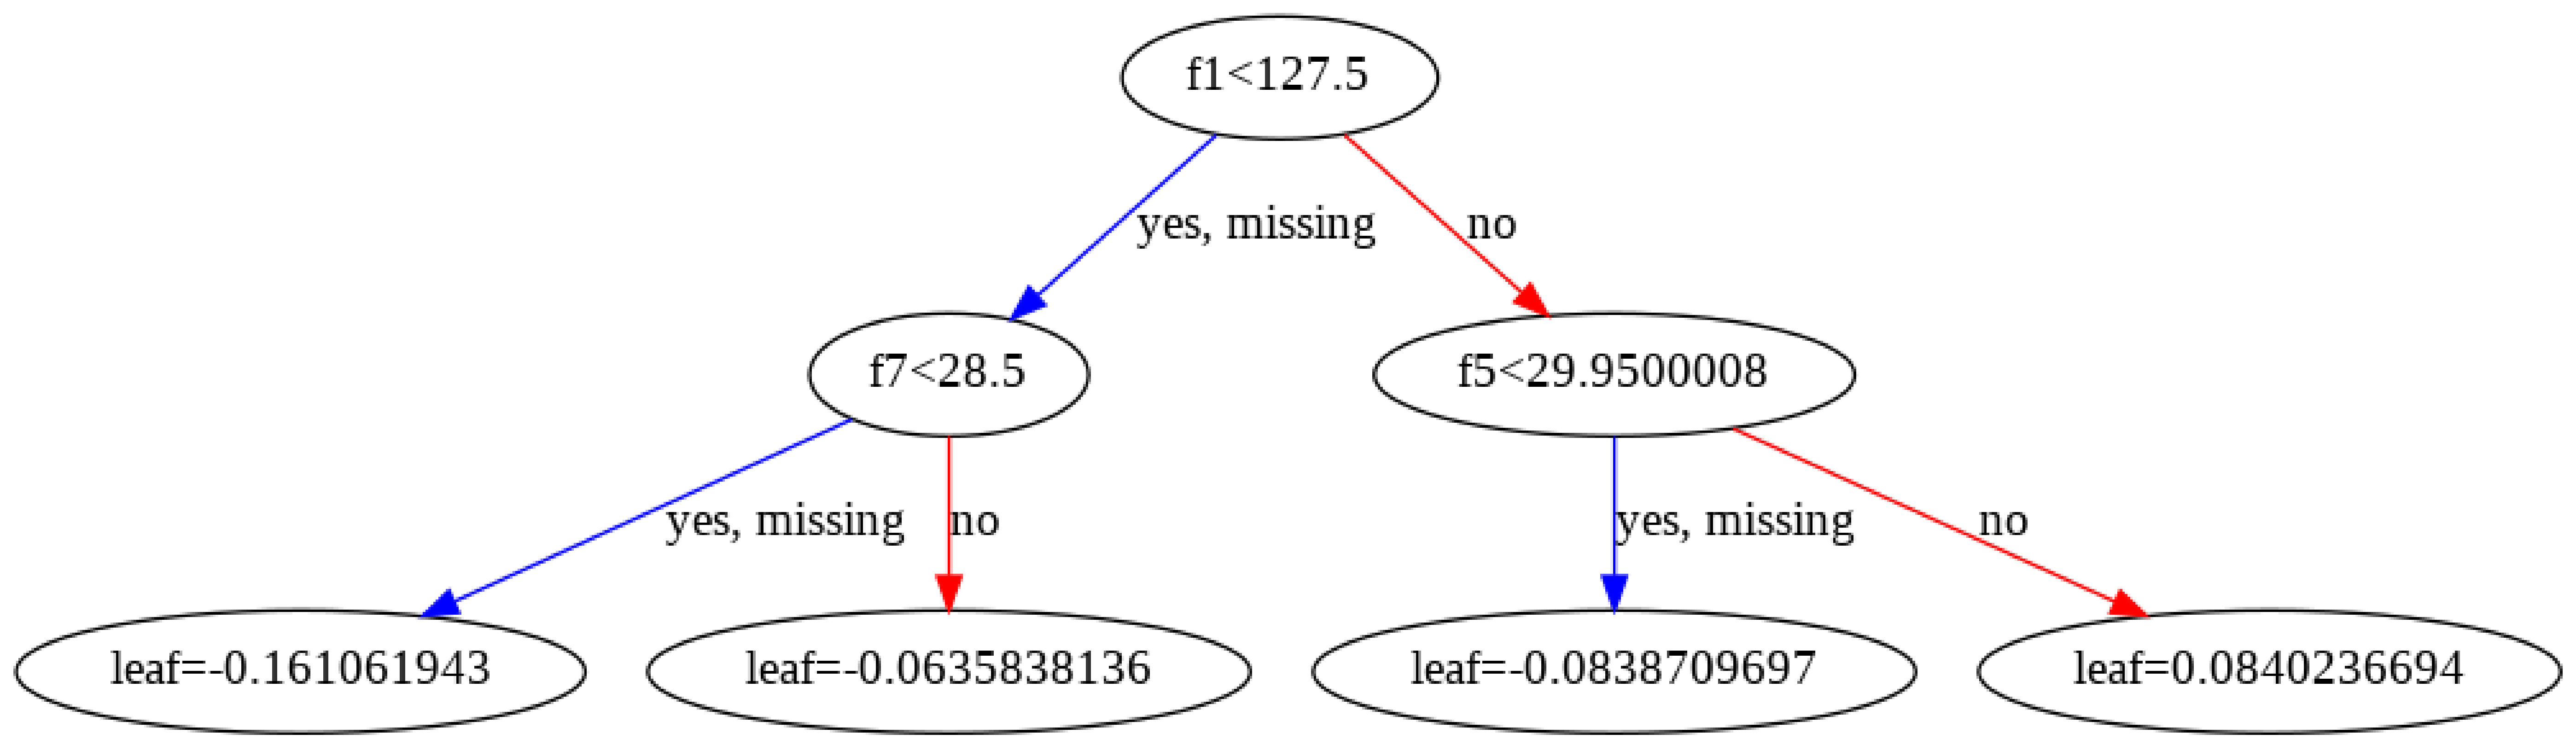

In [ ]:
#max_depth 옵션 조절해 가지치기
model2 = XGBClassifier(max_depth=2)
model2.fit(x_train, y_train)

plot_tree(model2)
plt.show()

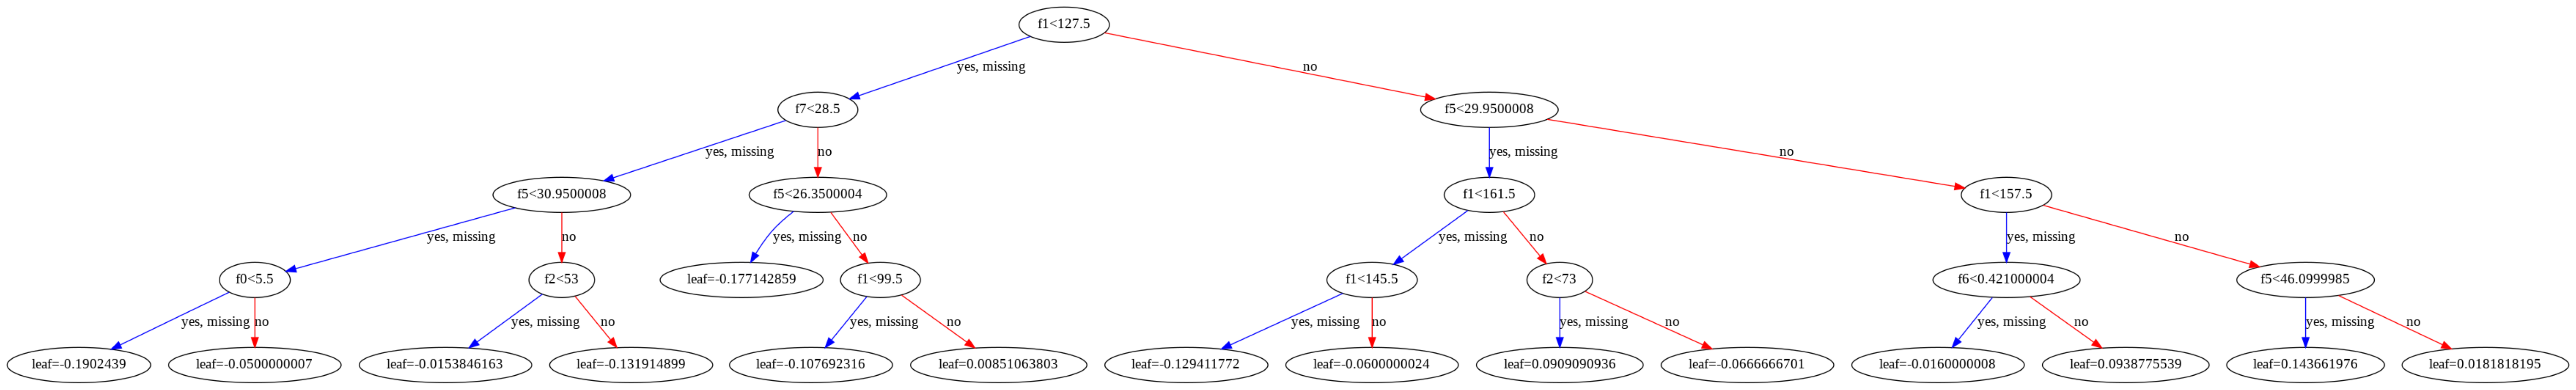

In [ ]:
#max_depth 옵션 조절해 가지치기
model3 = XGBClassifier(max_depth=4)
model3.fit(x_train, y_train)

plot_tree(model3)
plt.show()

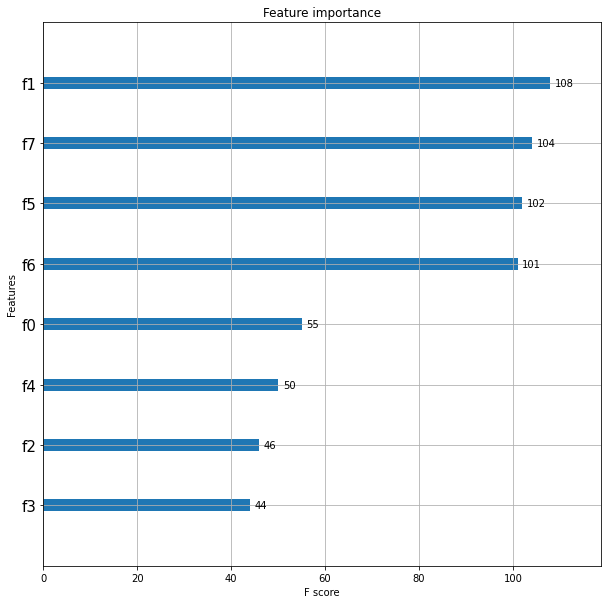

In [ ]:
#피처 중요도를 계산하고 시각화하는 코드
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()

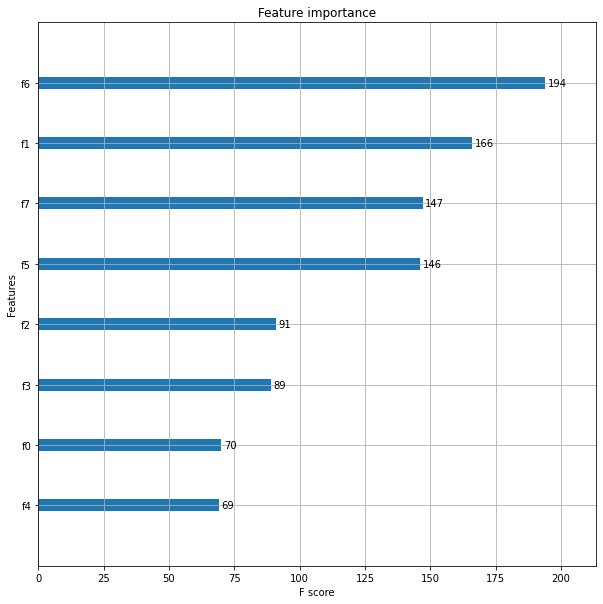

In [ ]:
plot_importance(model3)

plt.show()

부분 의존성 플롯 그리기

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox import info_plots

In [ ]:
import pandas as pd

In [ ]:
pima_data = pd.DataFrame(dataset, columns=['Pregnancise', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

pima_features = pima_data.columns[:8]
pima_target = pima_data.columns[8]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


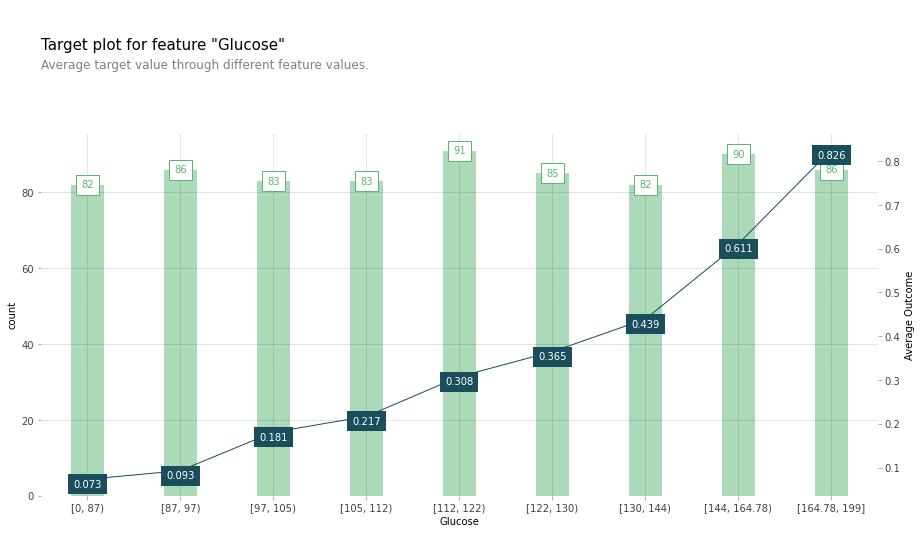

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target = pima_target
)

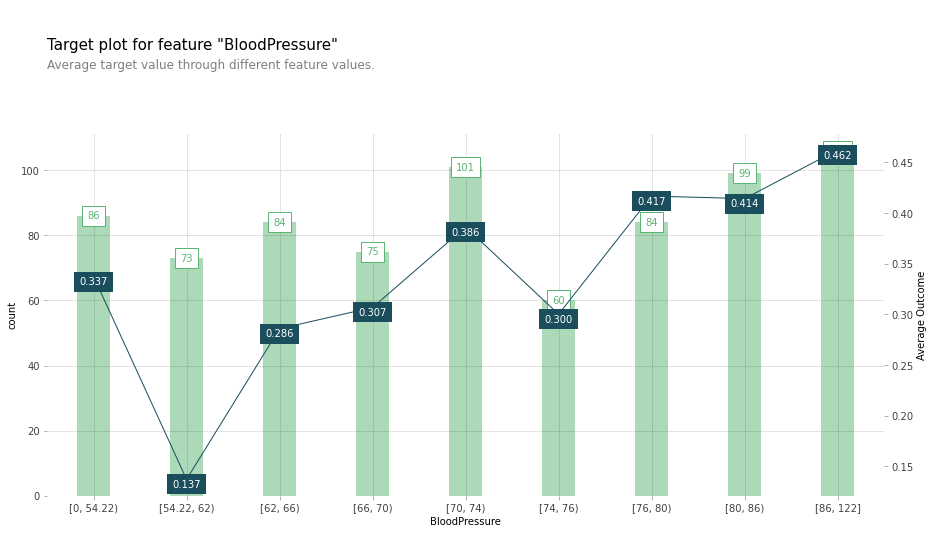

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target = pima_target
)

In [ ]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


모델의 실제 예측 분포 플롯

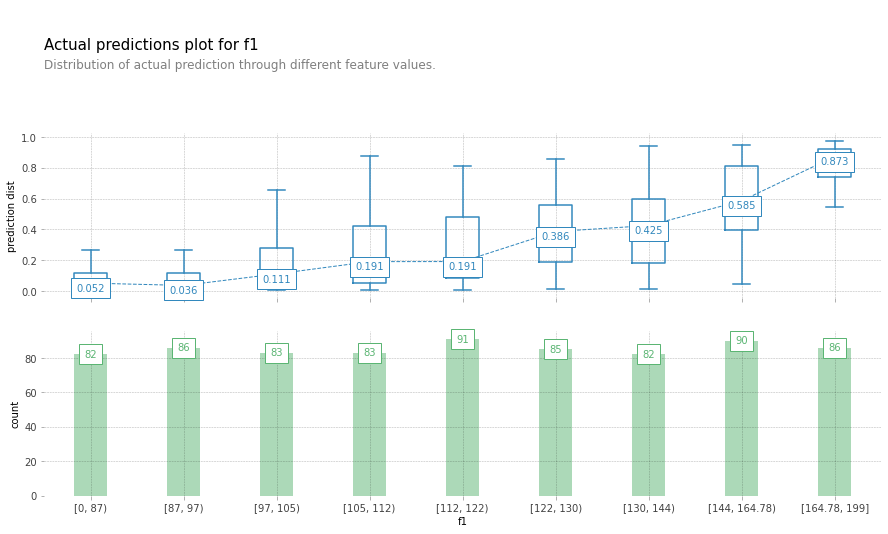

In [ ]:
pima_data = pd.DataFrame(dataset, columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8'])

pima_features = pima_data.columns[:8]
pima_target = pima_data.columns[8]
fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=pima_data[pima_features],
    feature='f1',
    feature_name='f1',
    predict_kwds={}
)

부분 의존성을 계산하고 플롯 그리기

In [ ]:
!pip install pdp

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


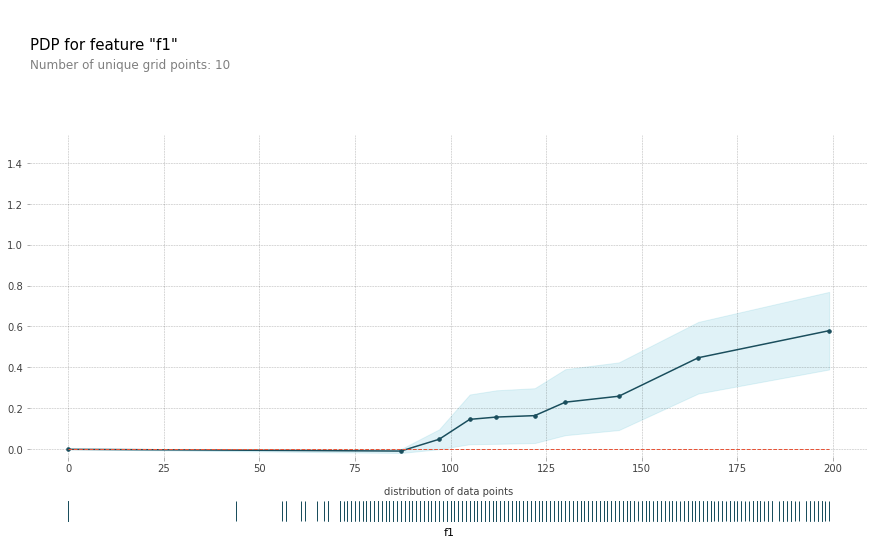

In [ ]:
import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_gc = pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='f1'
)

fig, axes = pdp_plot(
    pdp_gc,
    'f1',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

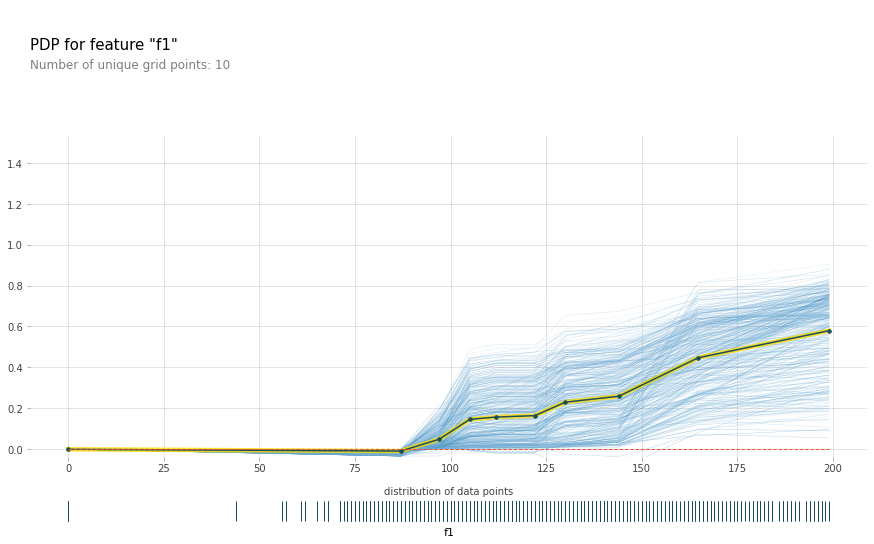

In [ ]:
fig, axes = pdp_plot(
    pdp_gc,
    'f1',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

두 피처에 대해 목표 플롯을 그리는 코드

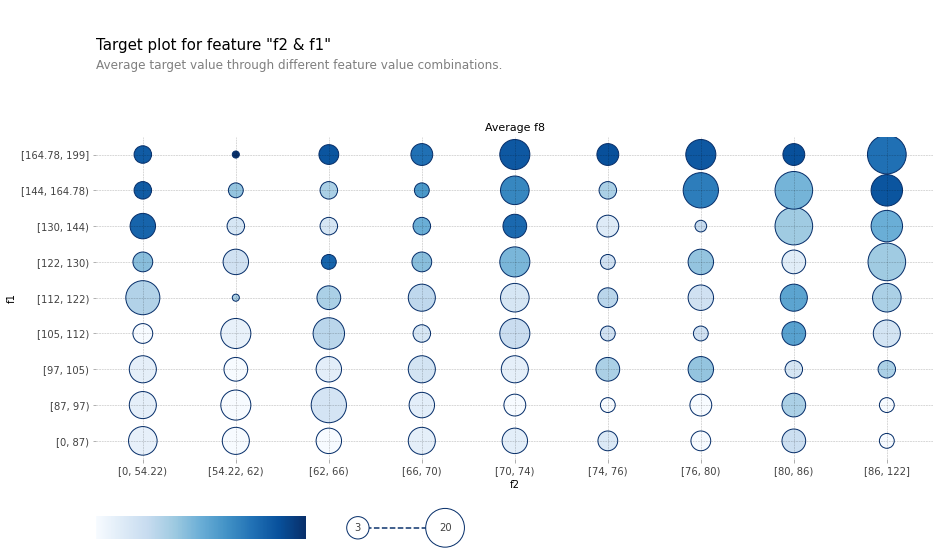

In [ ]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data,
    features=['f2','f1'],
    feature_names=['f2','f1'],
    target=pima_target
)